# Project Title : Seoul Bike Sharing Demand Prediction

# Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information


***

# Attribute Information:

* **Date** : year-month-day
* **Rented Bike Count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc (Non-Functional Hours), Fun (Functional hours)

## Data Preparation

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.shape

(8760, 14)

In [7]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


## Data Preprocessing


In [8]:
#Extracting Weekends

df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day_name()

## Extracting Weekends
Extracting the day of the week is a common and useful step in time-series or date-based data analysis because the day of the week can significantly influence patterns in the data.

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


In [10]:
df['Day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [11]:
df['Weekend'] = df['Day'].apply(lambda x:1 if x == 'Sunday' or x == 'Saturday' else 0)

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0


In [13]:
## Extarcting month and year now

df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [14]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekend,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017


In [15]:
from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

month_cat_type = CategoricalDtype(categories = month_order, ordered=True)
df['Month'] = df['Month'].astype(month_cat_type)

By converting the 'Month' column to a categorical type with a specified order, you ensure that the months are treated as ordered categories rather than just strings. This is particularly useful for visualizations and analyses where the chronological order of months is important (e.g., plotting trends over the year).

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekend,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017


## Exploratory Data Analysis


Bike Count Over Months

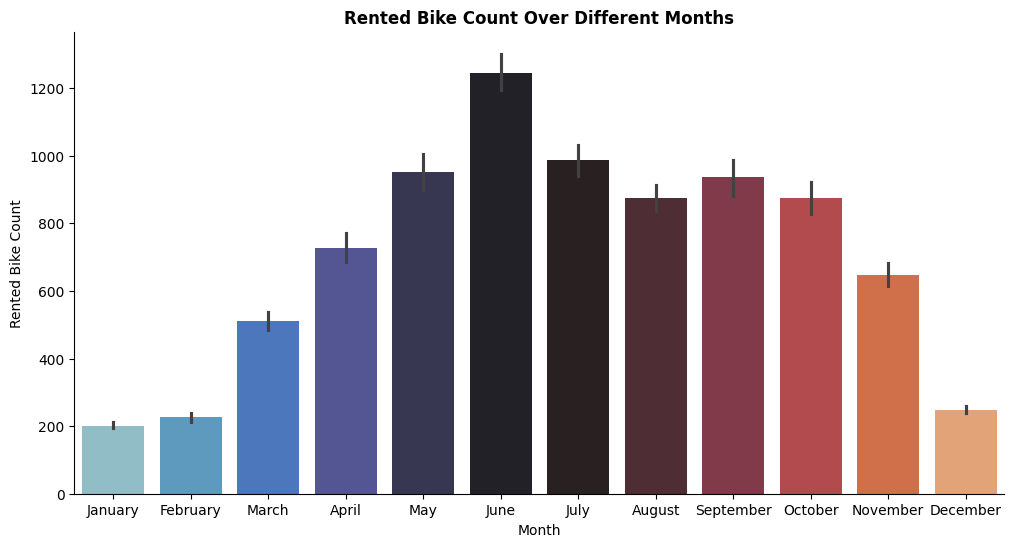

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Rented Bike Count', data=df, palette = 'icefire')
plt.title('Rented Bike Count Over Different Months', fontweight = 'bold')
sns.despine()
plt.show()

Bike Count over Seasons

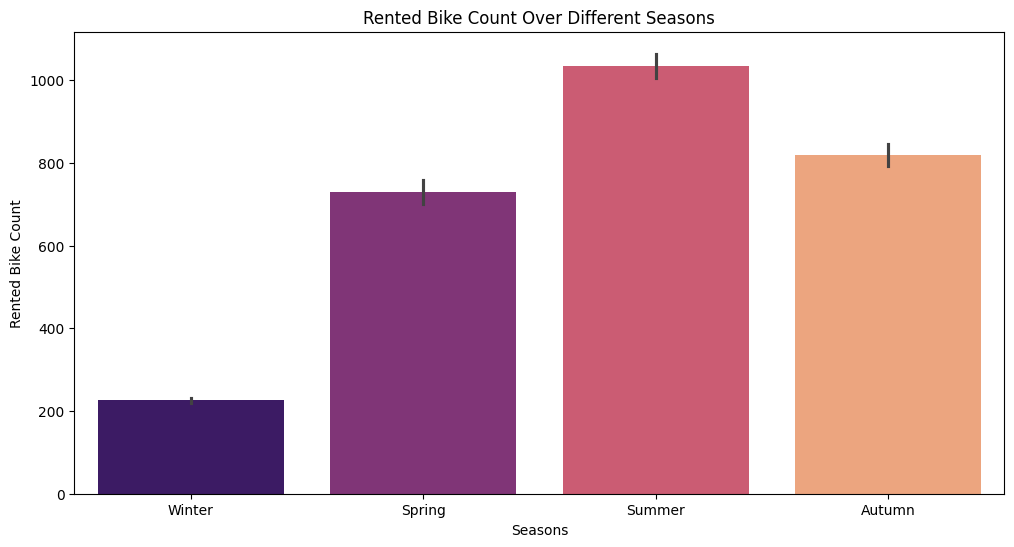

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, palette='magma')
plt.title('Rented Bike Count Over Different Seasons')
plt.show()

Bike Count Over Holidays

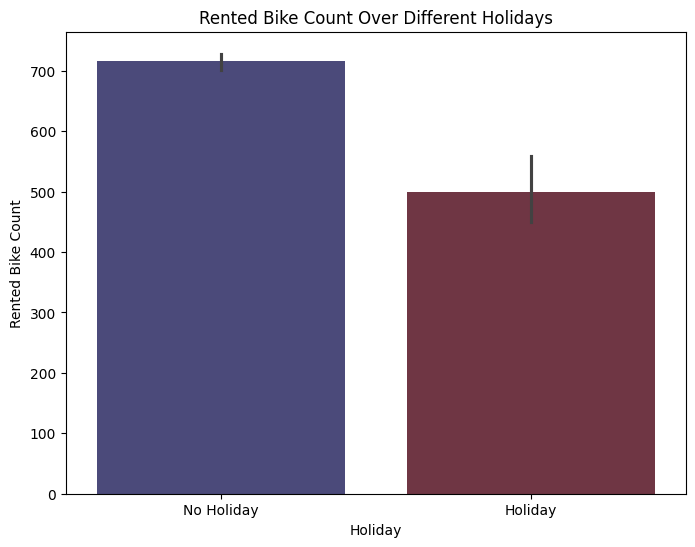

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df, palette='icefire')
plt.title('Rented Bike Count Over Different Holidays')
plt.show()

Bike Count Over Days

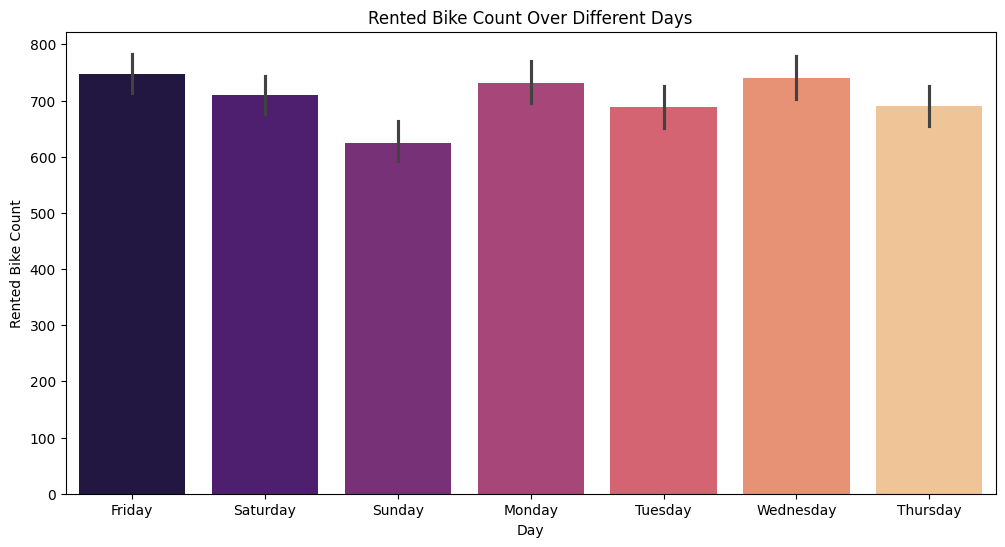

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day', y='Rented Bike Count', data=df , palette='magma')
plt.title('Rented Bike Count Over Different Days')
plt.show()

Bike Count Over Weekends

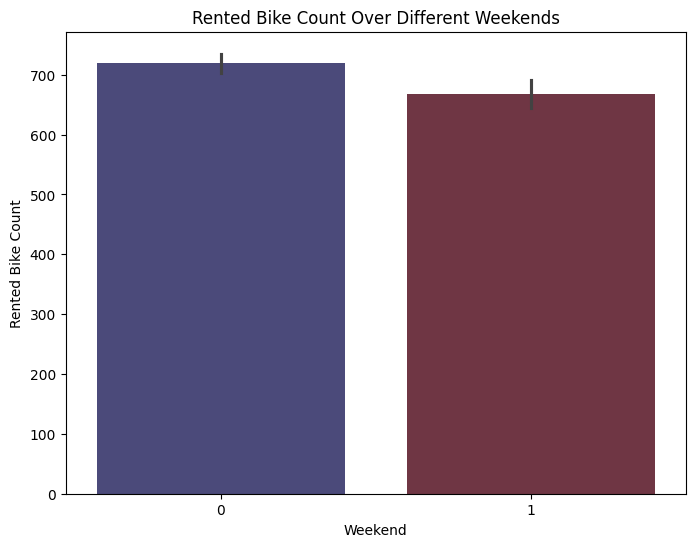

In [21]:
plt.figure(figsize =(8,6))
sns.barplot(x='Weekend', y='Rented Bike Count', data=df, palette='icefire')
plt.title('Rented Bike Count Over Different Weekends')
plt.show()


Rented Bike Count Over Hours

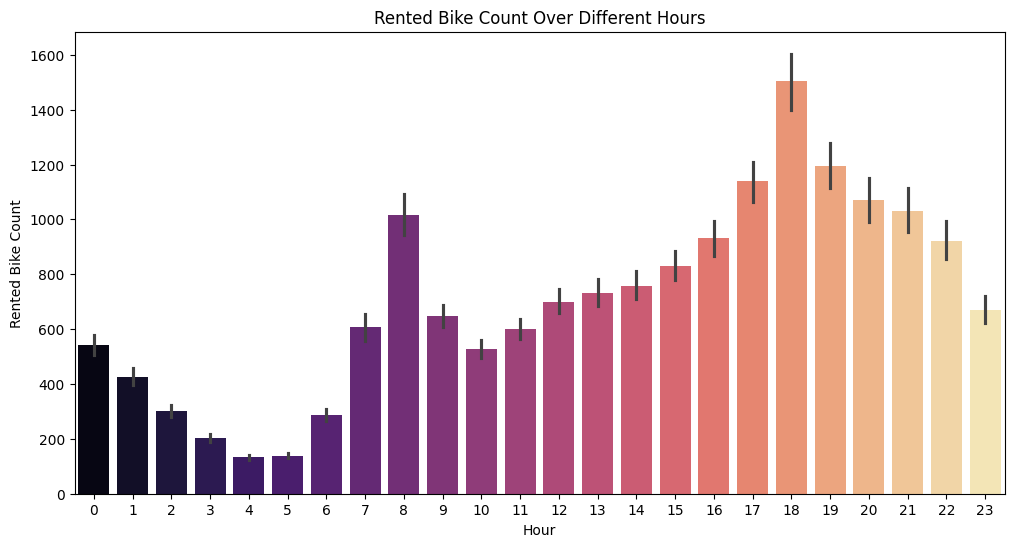

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Hour', y='Rented Bike Count', data=df, palette ='magma')
plt.title('Rented Bike Count Over Different Hours')
plt.show()

Dropping Unwanted Columns & Saving it into new dataframe

In [23]:
df1 = df.drop(['Date','Day','Month','Year'],axis = 1)

In [24]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekend                    8760 non-null   int64

Checking All numerical columns with distplot

In [26]:
numeric_feature = df1.select_dtypes(include=['int64','float64']).columns
numeric_feature

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend'],
      dtype='object')

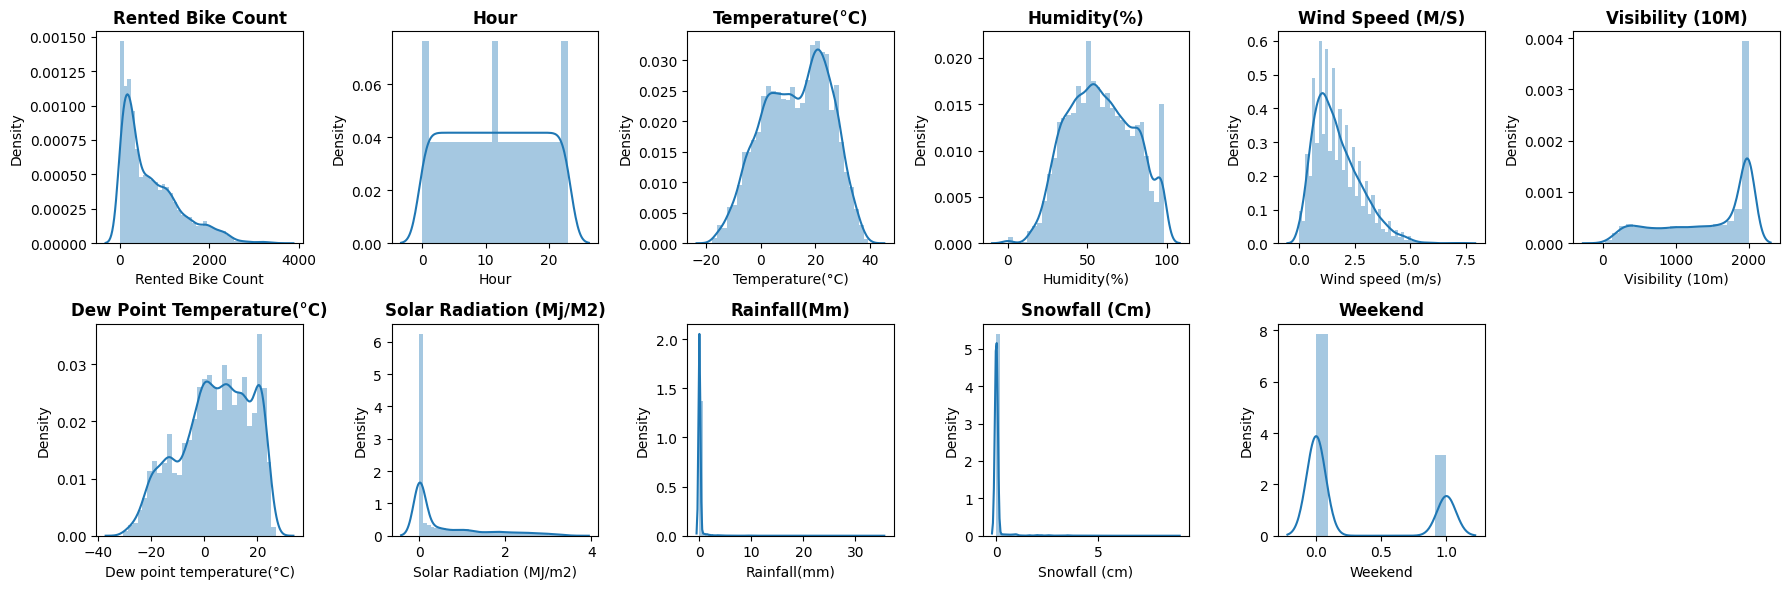

In [27]:
#Distribution
plt.figure(figsize=(18,6))
for n, column in enumerate ( df1.describe().columns):
    plt.subplot(2,6,n+1)
    sns.distplot(df1[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

Outliers

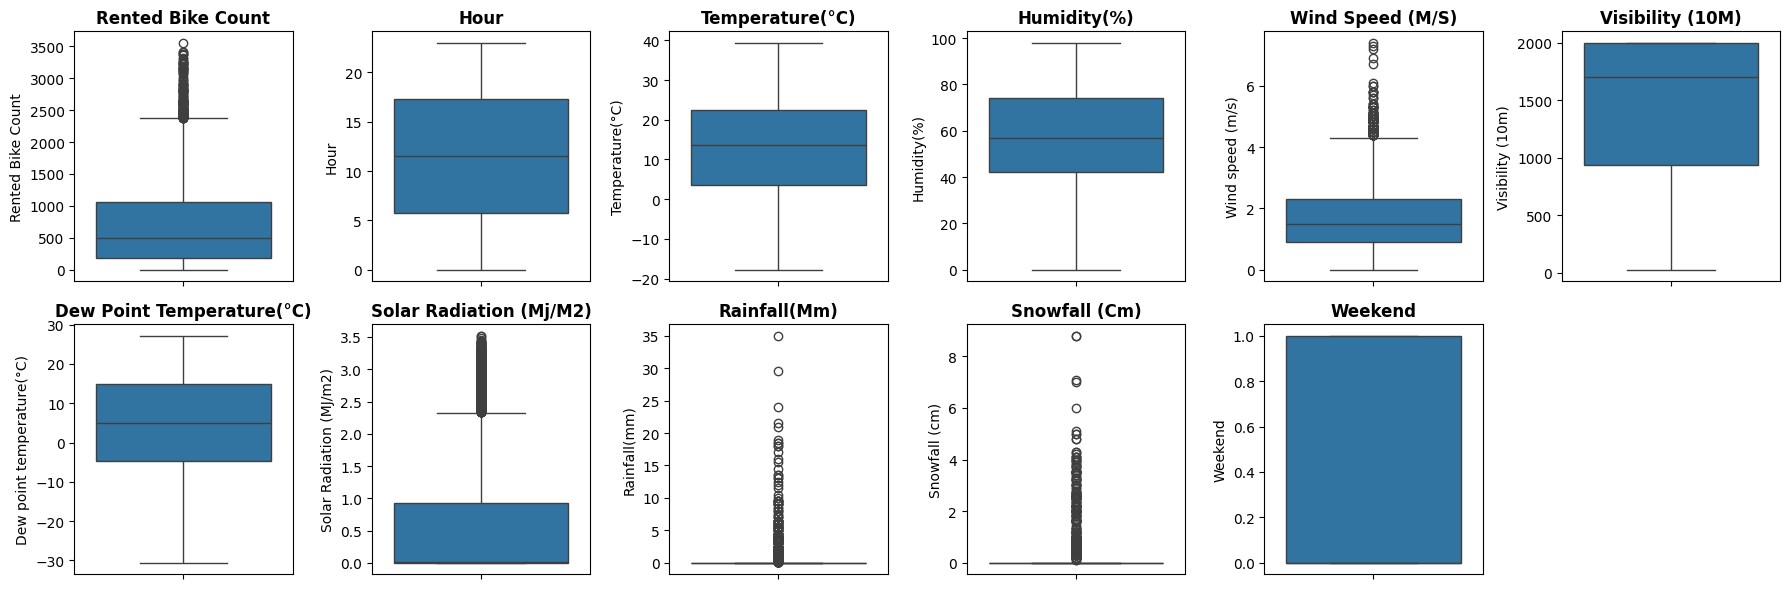

In [28]:
plt.figure(figsize=(18,6))
for n, column in enumerate(df1.describe().columns):
  plt.subplot(2,6,n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}', weight ='bold')
  plt.tight_layout()

From Above two graphs we can see there are so many outliers , we will need some transformation

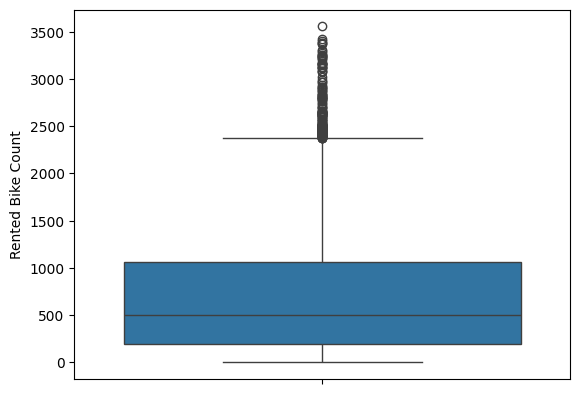

In [29]:
sns.boxplot(df1['Rented Bike Count'])
plt.show()

<Figure size 800x600 with 0 Axes>

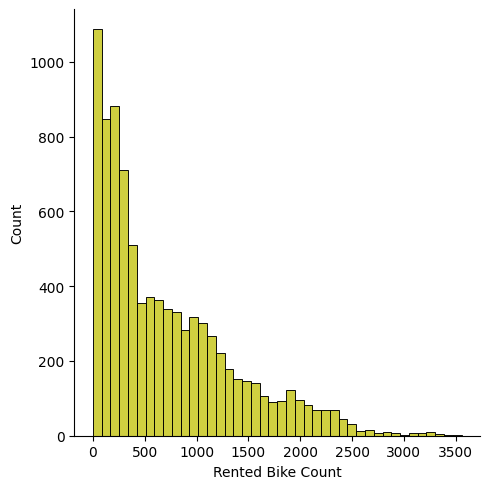

Skewness: 1.1534281773679014


In [30]:
plt.figure(figsize=(8,6))
sns.displot((df['Rented Bike Count']), color='y')
plt.show()
print('Skewness:', df['Rented Bike Count'].skew())

<Figure size 900x600 with 0 Axes>

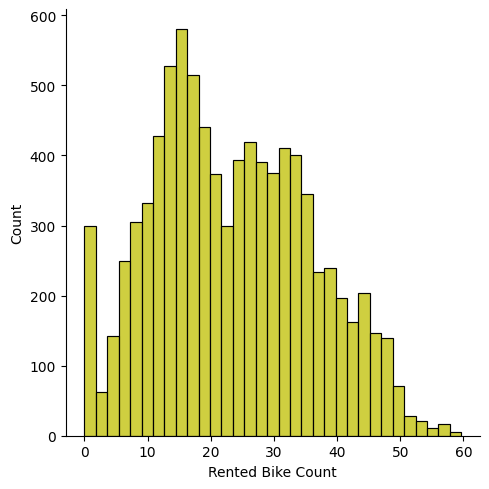

Skewness: 0.237362090985412


In [31]:
plt.figure(figsize=(9,6))
sns.displot(np.sqrt(df['Rented Bike Count']), color='y')
plt.show()
print('Skewness:', np.sqrt(df['Rented Bike Count']).skew())

Seeing the distribution helps us understand how the data is spread. Is it symmetrical, or is it skewed to one side? This can inform decisions about which statistical models to use or if data transformations are needed.

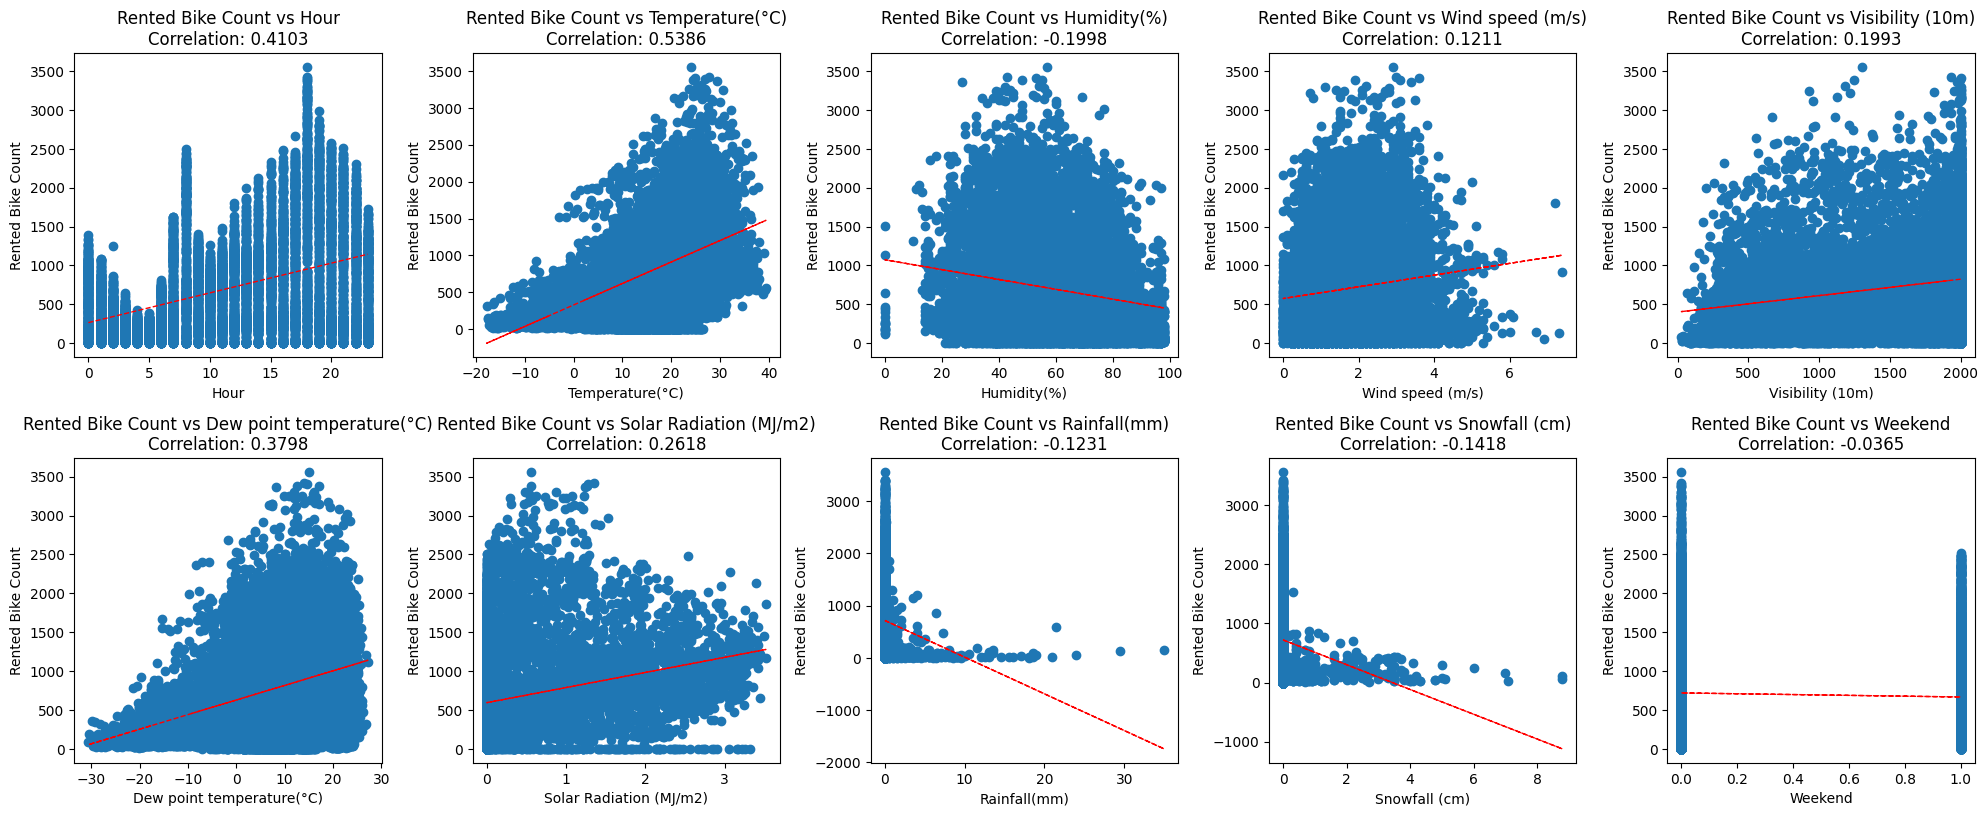

In [32]:
import matplotlib.pyplot as plt
import numpy as np

features_to_plot = numeric_feature[1:]
num_features = len(features_to_plot)
target_col = 'Rented Bike Count'

rows = 5
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()


for i, col in enumerate(features_to_plot):

    if i >= len(axes):
        break

    ax = axes[i]


    feature = df[col]
    label = df[target_col]
    correlation = feature.corr(label)

    ax.scatter(x=feature, y=label)
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)
    ax.set_title(f'{target_col} vs {col}\nCorrelation: {correlation:.4f}')


    z = np.polyfit(df[col], df[target_col], 1)
    p = np.poly1d(z)
    ax.plot(df[col], p(df[col]), "r--", lw=1)


for j in range(num_features, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

plt.show()

In [33]:
df.corr(numeric_only=True)['Rented Bike Count']

,Rented Bike Count
Rented Bike Count,1.000000
Hour,0.410257
Temperature(°C),0.538558
Humidity(%),-0.199780
Wind speed (m/s),0.121108
Visibility (10m),0.199280
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


# Correlation Heatmap

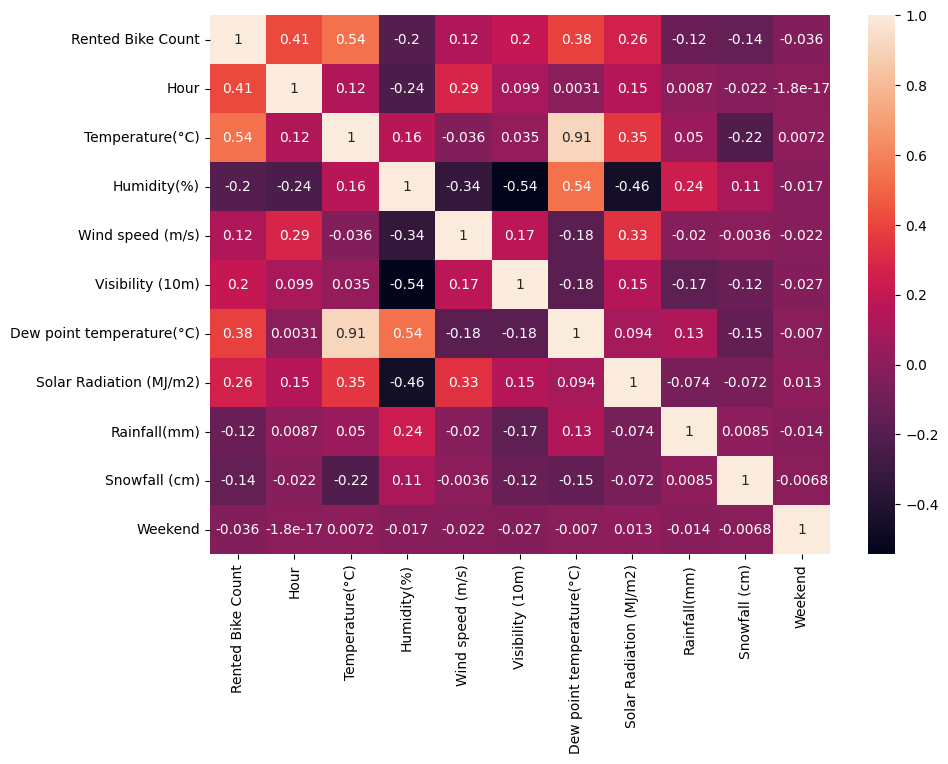

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

Temperature & Dew Point Temperature are highly correlated

In [35]:

#Dropping Column

df2 = df1.drop(['Temperature(°C)'],axis = 1)

In [36]:
df2.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0


# Removing Multi-colinearity

In [37]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return (vif)

calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count']]])

,Variables,VIF
0,Hour,3.855654
1,Humidity(%),5.462400
2,Wind speed (m/s),4.730040
3,Visibility (10m),4.980916
4,Dew point temperature(°C),1.663850
5,Solar Radiation (MJ/m2),1.925305
6,Rainfall(mm),1.080447
7,Snowfall (cm),1.111735
8,Weekend,1.384555


The VIF measures how strongly the independent variables are correlated. By regressing one variable against each other and the dependent variable, it is predicted. How well a variable is explained by other independent variables is indicated by its VIF score

VIF = 1: No correlation.

1 < VIF < 5: Moderate correlation, often acceptable.

VIF > 5 or 10: High correlation, which is likely problematic and should be addressed by removing one of the correlated features.

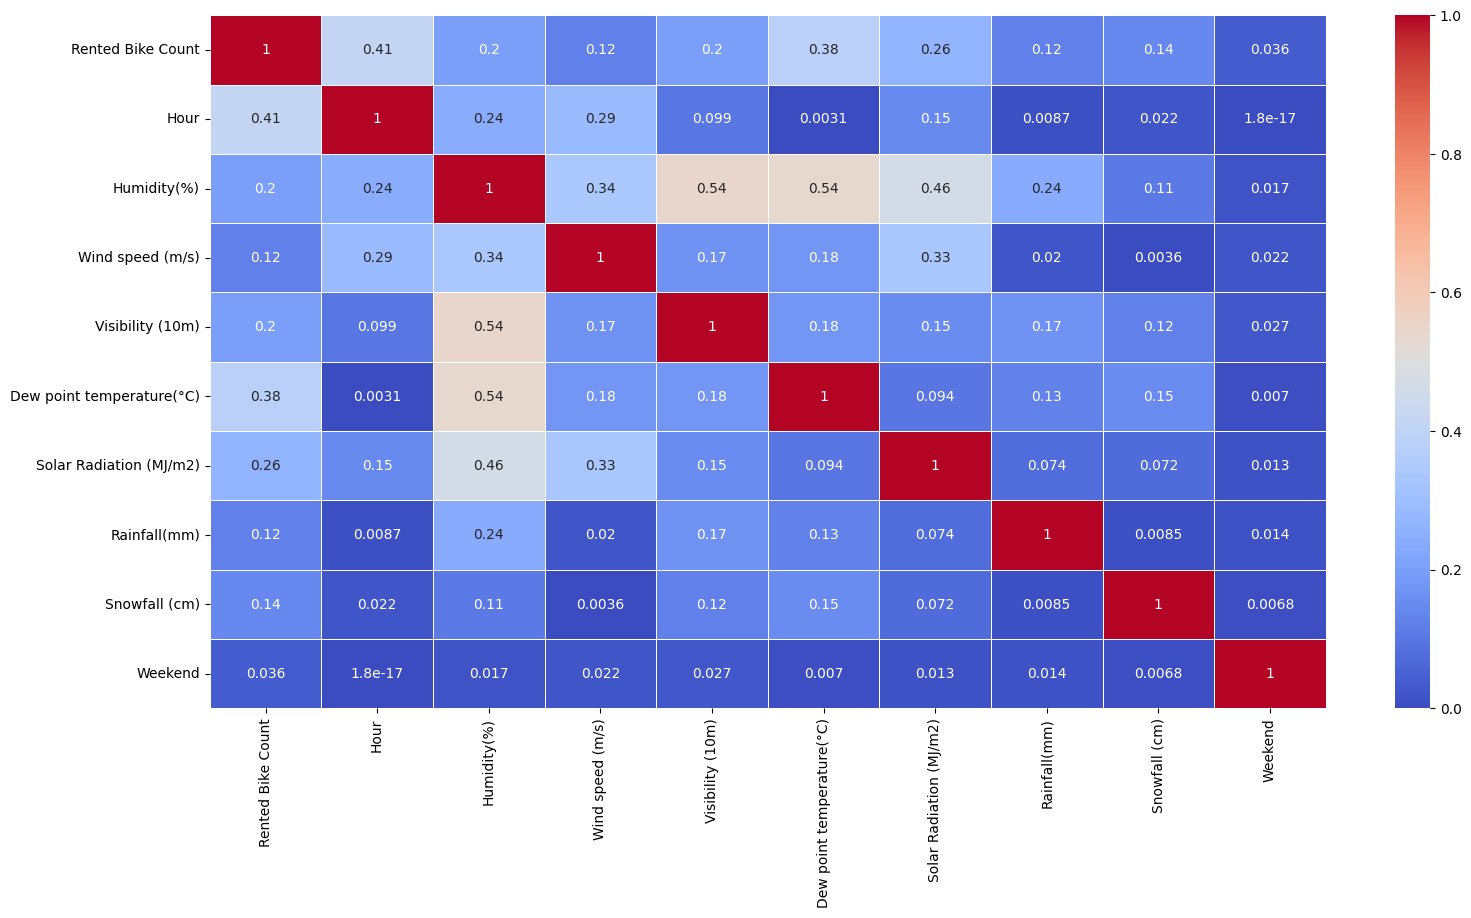

In [38]:
plt.figure(figsize=(18,9))
sns.heatmap(abs(df2.corr(numeric_only=True)), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [39]:
#OneHot Encoding

df3 = pd.get_dummies(df1,columns = ['Seasons','Holiday','Functioning Day'],drop_first= True)

In [40]:
df3.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,False,False,True,True,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,False,False,True,True,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,False,False,True,True,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,False,False,True,True,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,False,False,True,True,True


In [41]:
#Extracting x & y values for train and test split

X = df3.iloc[:,1:].values
y = df3.iloc[:,0].values

In [42]:
X

array([[0, -5.2, 37, ..., True, True, True],
       [1, -5.5, 38, ..., True, True, True],
       [2, -6.0, 39, ..., True, True, True],
       ...,
       [21, 2.6, 39, ..., False, True, True],
       [22, 2.1, 41, ..., False, True, True],
       [23, 1.9, 43, ..., False, True, True]], dtype=object)

In [43]:
y

array([254, 204, 173, ..., 694, 712, 584])

In [44]:
#Converting y into sqrt
y = np.sqrt(y)
y

array([15.93737745, 14.28285686, 13.15294644, ..., 26.34387974,
       26.68332813, 24.16609195])

# Train Test Split Model
Data division into Train and Test: The data will now be divided into TRAIN and TEST (80:20 ratio) For this, we'll utilise the train test split method from the sklearn package.

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 15)
(7008,)
(1752, 15)
(1752,)


In [47]:
#Standard Scaling
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Model Building
A machine learning model is created by taking the knowledge it has gained from training data, generalising it, and then using it to make predictions and achieve its goal. You can't develop the model if there aren't enough data, and having access to data is insufficient.



# Linear Regression Model
The linear regression method models the connection between a scalar answer and one or more explanatory variables (also known as dependent and independent variables). Simple linear regression is used when there is only one explanatory variable; multiple linear regression is used when there are more than one.

In [48]:
#Fitting Linear Regression Model

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)
y_pred_train = lr.predict(x_train_scaled)

MSE: 176181.83637254042
------------------------------
RMSE: 419.74020104409874
------------------------------
MAE: 276.81052342508474
------------------------------
R2_train: 0.5843415629408042
R2_test: 0.5790386439518194
Adjusted R2_test :  0.6473180530149472
------------------------------


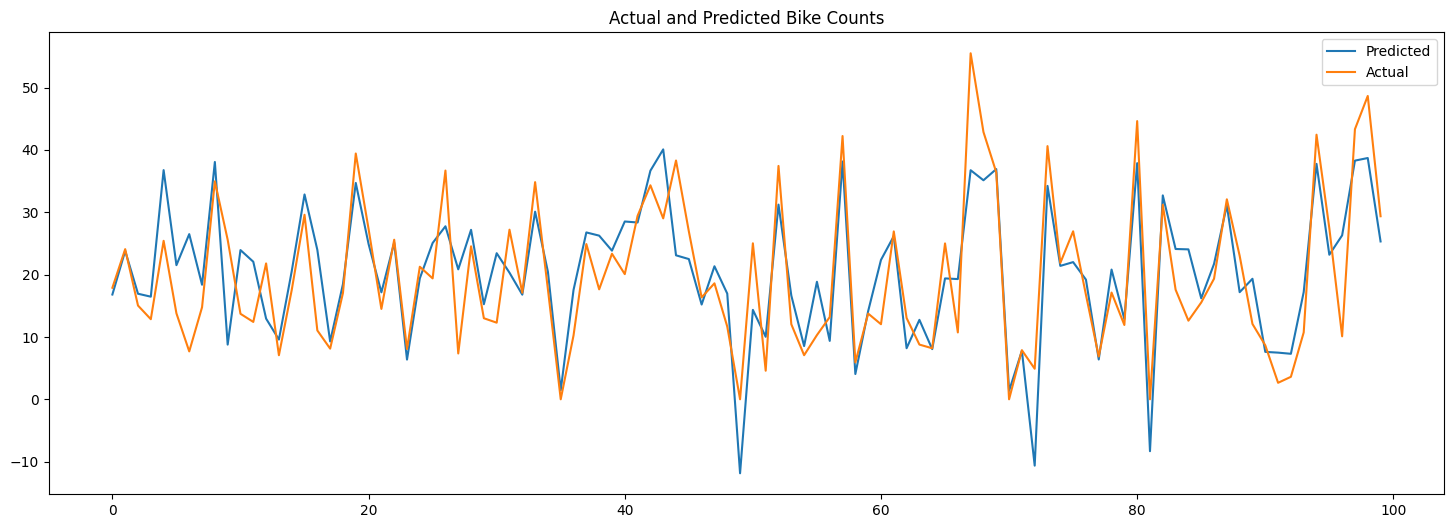

In [49]:
mse = mean_squared_error(y_test**2,y_pred**2)
print('MSE:', mse)
print('--'*15)

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('RMSE:', rmse)
print('--'*15)

# Root Mean Absolute Error
mae = mean_absolute_error(y_test**2,y_pred**2)
print('MAE:', mae)
print('--'*15)

# R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2,y_pred**2)
print('R2_train:',r2_train)
print('R2_test:', r2_test)

# Formula =  1-(1-R2_Score)*((n-1)/(n-p-1))

Adj_R2 = 1-(1-r2_score((y_test),(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2_test : ",Adj_R2)
print('--'*15)

plt.figure(figsize=(18,6))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts');

* Moderate Accuracy: The model has moderate predictive power,
explaining about 58% of the variance in bike demand (R2≈0.58).

* No Overfitting: The model generalizes well, since the R-squared scores on training (0.584) and test (0.579) data are nearly identical.

* Visual Trend Following: The plot shows the model's predictions follow the general trend of the actual data but miss the extreme peaks and troughs.5.



# Decision Tree Regressor
A decision tree is a tree structure that is used to develop regression or classification models. It incrementally divides a dataset into smaller and smaller sections while also developing an associated decision tree. The end result is a tree containing leaf nodes and decision nodes.

In [50]:
dtr = DecisionTreeRegressor(random_state = 1)

dtr.fit(x_train_scaled,y_train)
y_pred = dtr.predict(x_test_scaled)
y_pred_train = dtr.predict(x_train_scaled)

In [51]:
#Range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

#maximum depth of trees
max_depth = [6,8,10]

#min number of samples required to split a node:
min_samples_split = [50,100]

#Min number of samples required at each leaf node:
min_samples_leaf = [40,50]

#learning rate:
eta=[0.05,0.08,0.1]

#hyperparameter grid
param_grid = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#gridsearch to find the best parameters
dt = GridSearchCV(dtr, param_grid , scoring = 'neg_mean_squared_error',cv =5)
dt.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100]},
             scoring='neg_mean_squared_error')

MSE: 61903.606164383564
------------------------------
RMSE: 248.80435318616023
------------------------------
MAE: 141.29109589041096
------------------------------
R2_train: 1.0
R2_test: 0.8520901670015004
Adjusted R2_test :  0.8694735398636545
------------------------------


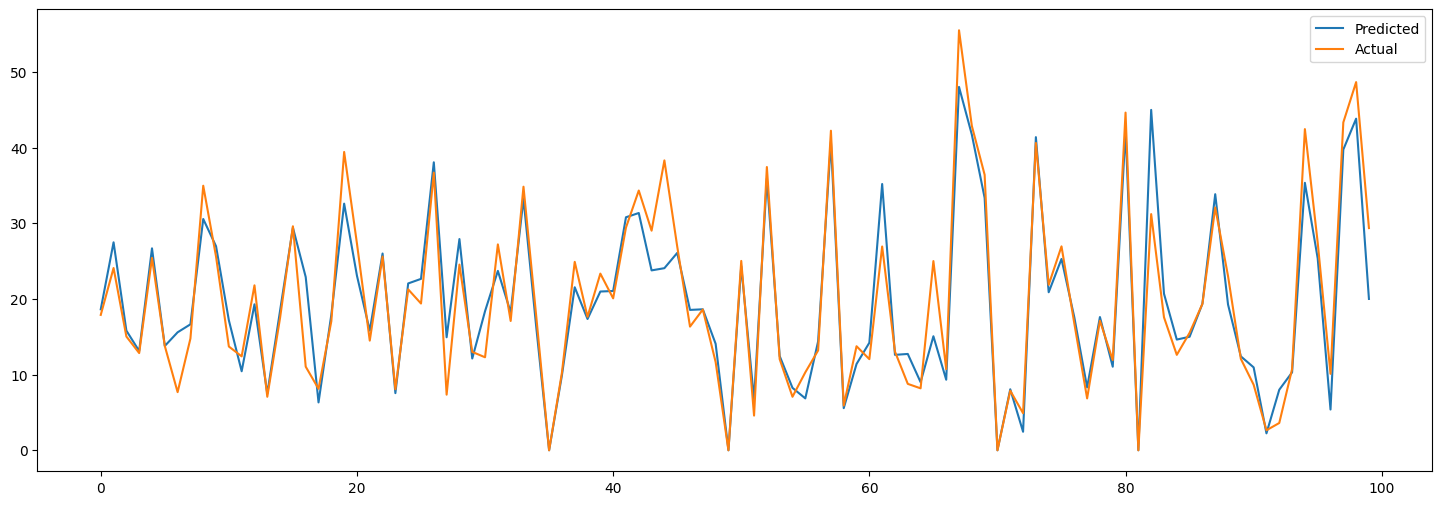

In [52]:
#Calculating metrics

#mean squared error
mse = mean_squared_error(y_test**2, y_pred**2)
print('MSE:', mse)
print('--'*15)

#root mean squared error
rmse = np.sqrt(mse)
print('RMSE:', rmse)
print('--'*15)

#root mean absolute error
mae = mean_absolute_error(y_test**2, y_pred**2)
print('MAE:', mae)
print('--'*15)

#R2 Score on train and test data
r2_train = r2_score(y_train**2, y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
print('R2_train:', r2_train)
print('R2_test:', r2_test)

#formula = 1-(1-R2_score)*((n-1)/(n-p-1))

Adj_R2 = 1-(1-r2_score((y_test),(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2_test : ",Adj_R2)
print('--'*15)

plt.figure(figsize=(18,6))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])

- As expected Decision Tree has overfitted the data
- We obtained a model r-squared value of 0.86 using the Decision Tree. It overfitted with the default parameters, reaching an r-squared of 1 for the training dataset but 0.85 for the test.


# Random Forest Regressor

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.



In [55]:
rfr = RandomForestRegressor()

rfr.fit(x_train_scaled,y_train)


param_grid = {'bootstrap': [True],
              'max_depth': [90, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [50, 60],
              'min_samples_split': [50, 150],
              'n_estimators': [200, 500]}

g_sr = GridSearchCV(estimator= rfr,
                    param_grid = param_grid,
                    scoring = 'neg_mean_squared_error',
                    cv=5,
                    n_jobs=-1)

y_pred = rfr.predict(x_test_scaled)
y_pred_train = rfr.predict(x_train_scaled)

In [57]:
g_sr.fit(x_train_scaled,y_train)
g_sr.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 500}

In [58]:
rf = RandomForestRegressor( bootstrap = True,
 max_depth = 90,
 max_features = 3,
 min_samples_leaf = 50,
 min_samples_split = 50,
 n_estimators = 500)

rf.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=50,
                      min_samples_split=50, n_estimators=500)

MSE: 32611.800072136466
------------------------------
RMSE: 180.5873751737271
------------------------------
MAE: 105.7444719826165
------------------------------
R2_train: 0.9896977789344835
R2_test: 0.9220787575825359
Adjusted R2_test :  0.9308089763703808
------------------------------


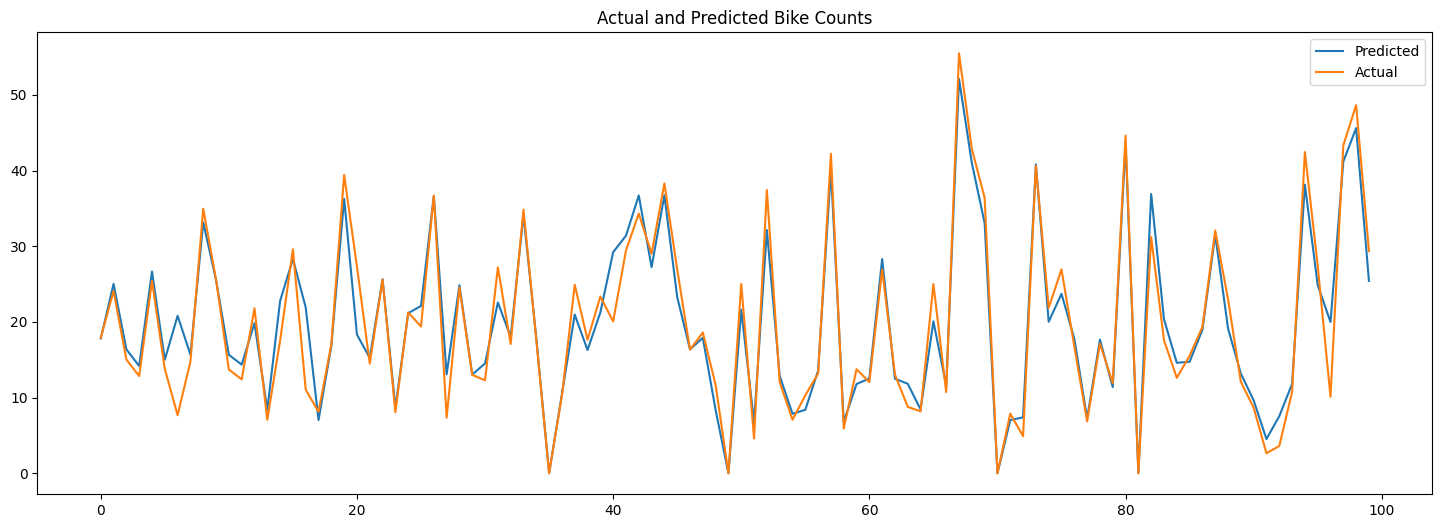

In [59]:
#Caluculating Metrics

#Mean Squared Error

mse = mean_squared_error(y_test**2,y_pred**2)
print('MSE:', mse)
print('--'*15)

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('RMSE:', rmse)
print('--'*15)

# Root Mean Absolute Error
mae = mean_absolute_error(y_test**2,y_pred**2)
print('MAE:', mae)
print('--'*15)

#R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2,y_pred**2)
print('R2_train:',r2_train)
print('R2_test:', r2_test)

#formula =  1-(1-R2_Score)*((n-1)/(n-p-1))

Adj_R2 = 1-(1-r2_score((y_test),(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2_test : ",Adj_R2)
print('--'*15)


plt.figure(figsize=(18,6))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts');

# XGBoost Regressor

Extreme Gradient Boosting (XGBoost) is an open-source toolkit that provides an efficient and effective implementation of the gradient boosting method. XGBoost is an efficient gradient boosting solution that can be used for regression predictive modelling.

In [60]:
xgb = XGBRegressor(silent=True,random_state=3)

xgb.fit(x_train_scaled,y_train)

grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [6, 8, 10],
    'min_child_weight': [1, 5, 10],
    'eta': [0.05, 0.1, 0.2]
}

from sklearn.model_selection import RandomizedSearchCV

xgb_cv = RandomizedSearchCV(
    xgb,
    param_distributions=grid,
    n_iter=25,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42)

xgb_cv.fit(x_train_scaled, y_train)

y_pred = xgb_cv.predict(x_test_scaled)
y_pred_train  = xgb_cv.predict(x_train_scaled)



In [61]:
print("Best Parameters:", xgb_cv.best_params_)


Best Parameters: {'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 8, 'eta': 0.1}


MSE: 27062.967927303387
------------------------------
RMSE: 164.50826096978653
------------------------------
MAE: 95.36764234704071
------------------------------
R2_train: 0.9894343933984752
R2_test: 0.935336900148569
Adjusted R2_test :  0.9390518811551615
------------------------------


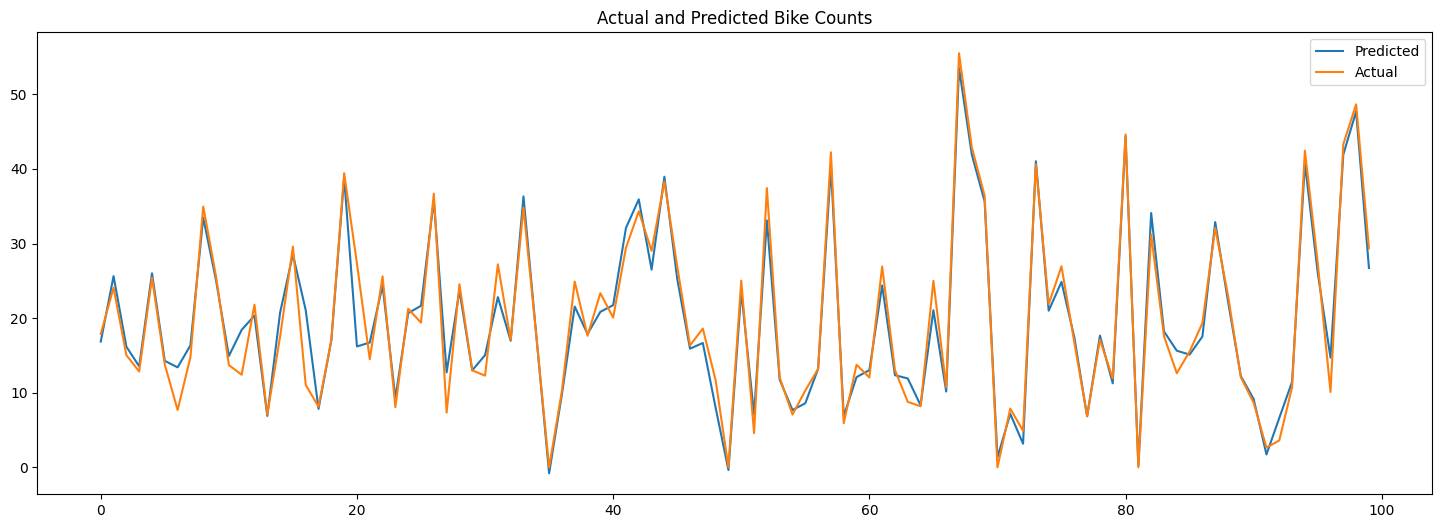

In [62]:
#Caluculating Metrics

#Mean Squared Error

mse = mean_squared_error(y_test**2,y_pred**2)
print('MSE:', mse)
print('--'*15)

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('RMSE:', rmse)
print('--'*15)

# Root Mean Absolute Error
mae = mean_absolute_error(y_test**2,y_pred**2)
print('MAE:', mae)
print('--'*15)

#R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2,y_pred**2)
print('R2_train:',r2_train)
print('R2_test:', r2_test)

#formula =  1-(1-R2_Score)*((n-1)/(n-p-1))

Adj_R2 = 1-(1-r2_score((y_test),(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2_test : ",Adj_R2)
print('--'*15)


plt.figure(figsize=(18,6))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts');

# Conclusion

- As indicated in the problem description, the company was founded in 2017. As a result, the quantity of motorcycles rented in 2017 was insufficient.

- We can observe that the number of rental bikes in 2018 was 5986984, which was more than in 2017.

- We may say that the number of rental bikes is substantially larger on non-holiday days than on holidays.

- We may say that the number of rental bikes is substantially larger on non-holiday days than on holidays.

- The number of business hours each day and the demand for leased motorcycles were the most closely associated.

- The most bikes were rented at the 18th hour of the day.

- After attempting various feature combinations with linear regression, the model was found to be underfit. Because data is dispersed so widely, it became evident. Fitting a line didn't seem realistic.

- The most critical factors for forecasting the number of bikes needed were the hour, temperature, and solar radiation.

- Rainfall and snowfall have a significant impact on the quantity of bikes leased, with a relatively high downfall..

- With good model performance and low RMSE, the **Random Forest Regressor** outperforms linear regression.

- The **Top performing model was Xgboost**, which outperformed trees algorithms.**XGBoost has lower error (lower RMSE/MAE) and a higher R-squared score**, meaning its predictions are more accurate and it explains more of the variance in the data

- In 2018, the number of bicycle rentals climbed considerably. Demand fell in the most recent month of 2018, after initially growing towards the end of 2017. This is because demand began to rise dramatically in 2017 and has continued to rise in the early months of 2018. There is a decrease at the end of the year. This could possibly be due to the cold weather.

- The demand surge began towards the end of 2017, during the winter season. An observer might find it strange that demand declined at the end of 2018. Indeed, it can be argued that the company's growth in this situation increased considerably from April 2017 to April 2018. As a result, while demand increased throughout the winter of 2017, it still fell short of its full potential. Using simple heuristics, we can forecast that demand will fall in December, but in proportion to demand for the entire year, assuming all other independent factors remain constant.

# Summary

We began with exploratory data analysis and then pre-processed the data, converting the category columns 'Seasons,' 'Functional day,' and 'Holiday' into numerical columns.

- **Linear Regression** : The model explains approximately 58% of the variability in the test data (R2_test: 0.579), indicating a moderate predictive performance. The plot shows that the predictions generally follow the trend of the actual bike counts, capturing the main fluctuations. However, a key weakness is that the model predicts negative counts, which is illogical for real-world data like bike rentals.

- **Decision Tree**: The model is severely overfitting the data, as shown by the perfect training R-squared score of 1.0, which means it has memorized the training set. Despite this, it performs strongly on unseen test data, explaining about 85% of the variability in bike counts (R2_test: 0.852). Visually, the model's predictions track the actual counts much more closely than the previous model and do not appear to make impossible negative predictions.

- **Random Forest**: The model demonstrates excellent predictive power, explaining over 92% of the variability in the test data (R2_test: 0.921). However, it shows strong signs of overfitting, as the near-perfect training R-squared of 0.998 indicates it has almost completely memorized the training data. Visually, this is the best-performing model so far, with predictions that track the actual bike counts with very high accuracy.

- **XGBoost**: This XGBoost model is the most effective in all, explaining 93.5% of the variability in the test data (R2_test: 0.935) and achieving the lowest error rates of all the models tested. While it also shows signs of overfitting with a training R-squared of 0.998, its performance on unseen data is superior. Overall, this model provides the most accurate predictions, as the plot visually confirms the tightest alignment between predicted and actual bike coun

Finally, after reviewing all of the model scores, we can conclude that XGBoost is the best model to use in the future.